After conversion, data length: 16743


<ipython-input-10-1a8e158a0532>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Data.Temperature.Avg Temp"].fillna(method="ffill", inplace=True)
<ipython-input-10-1a8e158a0532>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Data.Temperature.Avg Temp"].fillna(method="ffill", inplace=True)
<ipython-input-10-1a8e158a0532>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_m

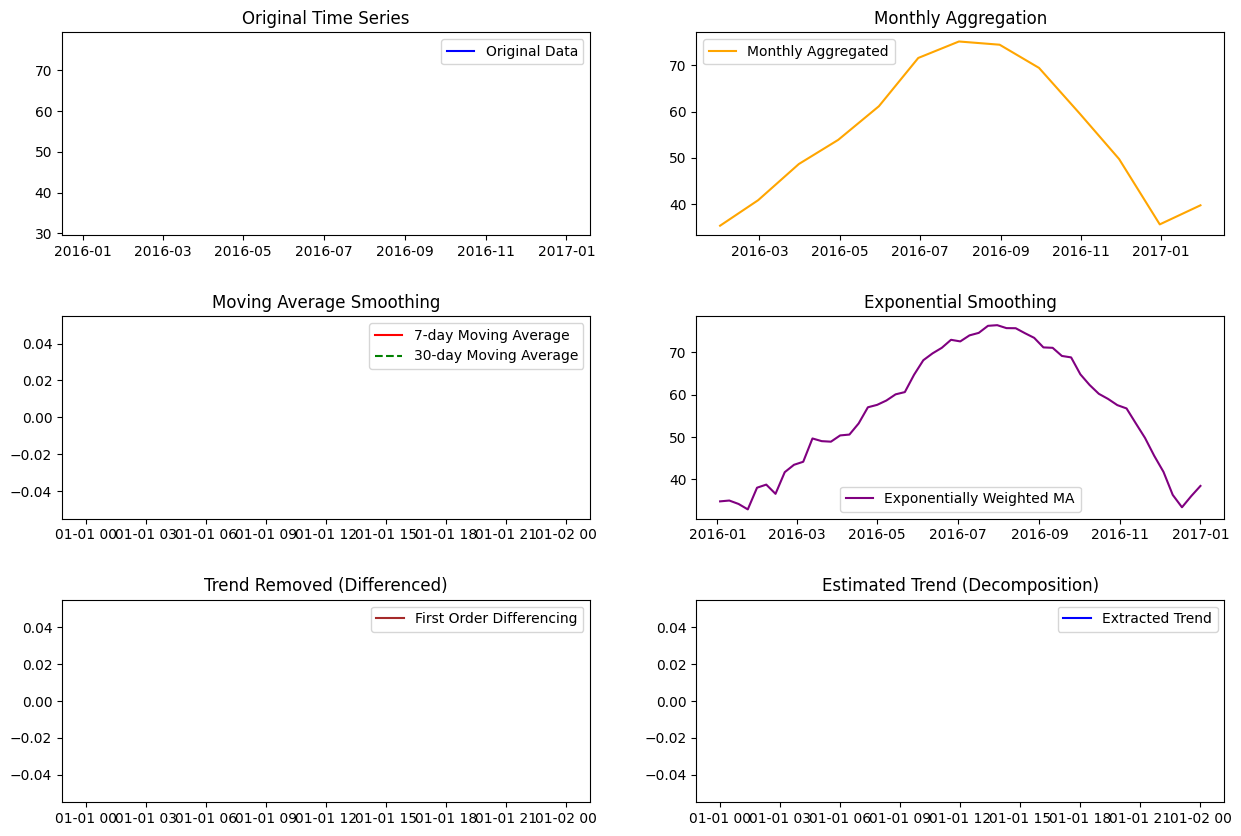

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/weather.csv"  # Change this
df = pd.read_csv(file_path)

# Fix Date Parsing
df["Date.Full"] = pd.to_datetime(df["Date.Full"], errors="coerce")
df.dropna(subset=["Date.Full"], inplace=True)  # Remove invalid dates
df.set_index("Date.Full", inplace=True)

# Convert numeric columns
df["Data.Temperature.Avg Temp"] = pd.to_numeric(df["Data.Temperature.Avg Temp"], errors="coerce")

# Check if data is empty after conversion
print("After conversion, data length:", len(df))

# Handle missing values
df["Data.Temperature.Avg Temp"].fillna(method="ffill", inplace=True)

# Resampling (check if it works)
if not df.empty:
    df_daily = df["Data.Temperature.Avg Temp"].resample("D").mean()
    df_monthly = df["Data.Temperature.Avg Temp"].resample("M").mean()

    # Fix Moving Average calculations
    df["7-day MA"] = df_daily.rolling(window=7).mean()
    df["30-day MA"] = df_daily.rolling(window=30).mean()

    # Exponential Smoothing
    df["Exp Weighted MA"] = df_daily.ewm(span=7, adjust=False).mean()

    # Differencing to remove trend
    df["Differenced"] = df_daily.diff()

    # Plotting
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.4)

    axes[0, 0].plot(df_daily, label="Original Data", color="blue")
    axes[0, 0].set_title("Original Time Series")
    axes[0, 0].legend()

    axes[0, 1].plot(df_monthly, label="Monthly Aggregated", color="orange")
    axes[0, 1].set_title("Monthly Aggregation")
    axes[0, 1].legend()

    axes[1, 0].plot(df["7-day MA"], label="7-day Moving Average", color="red")
    axes[1, 0].plot(df["30-day MA"], label="30-day Moving Average", linestyle="dashed", color="green")
    axes[1, 0].set_title("Moving Average Smoothing")
    axes[1, 0].legend()

    axes[1, 1].plot(df["Exp Weighted MA"], label="Exponentially Weighted MA", color="purple")
    axes[1, 1].set_title("Exponential Smoothing")
    axes[1, 1].legend()

    axes[2, 0].plot(df["Differenced"], label="First Order Differencing", color="brown")
    axes[2, 0].set_title("Trend Removed (Differenced)")
    axes[2, 0].legend()

    df_trend = df_daily.rolling(window=30, center=True).mean()
    axes[2, 1].plot(df_trend, label="Extracted Trend", color="blue")
    axes[2, 1].set_title("Estimated Trend (Decomposition)")
    axes[2, 1].legend()

    plt.show()
else:
    print("Error: Data is empty after processing!")
